In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("C:/Users/niman/OneDrive/Desktop/Nima/AI/MNIST_NN/archive/mnist_train.csv")
test = pd.read_csv("C:/Users/niman/OneDrive/Desktop/Nima/AI/MNIST_NN/archive/mnist_test.csv")

In [4]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
train.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [8]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

<AxesSubplot:>

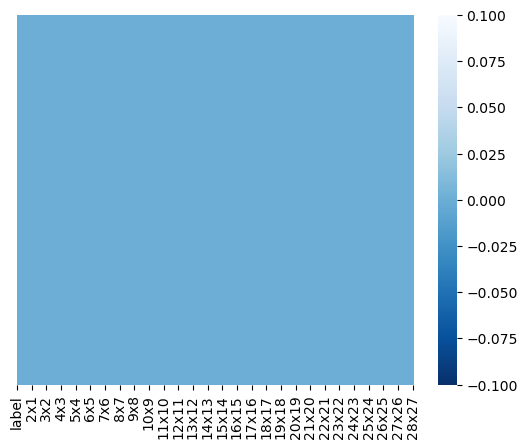

In [9]:
sns.heatmap(train.isnull(), yticklabels=False , cmap="Blues_r")

In [10]:
test.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [11]:
print(
train.shape,
test.shape
)

(60000, 785) (10000, 785)


In [12]:
train.dtypes.describe()

count       785
unique        1
top       int64
freq        785
dtype: object

In [13]:
# split data

x_train = train.drop("label", axis=1)
y_train = train.pop("label")

x_test = test.drop("label", axis=1)
y_test = test.pop("label")

In [14]:
x_train.shape

(60000, 784)

In [15]:
# 785 - 784 = 1 LABEL ,, we have 784 pixels ---> 28*28 IMGs

<AxesSubplot:xlabel='label', ylabel='count'>

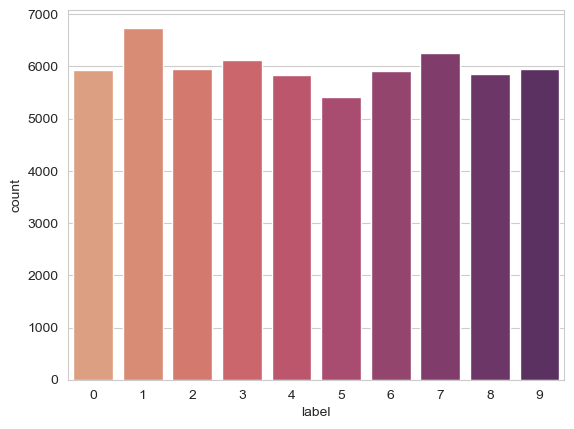

In [16]:
sns.set_style("whitegrid")
sns.countplot(x=y_train,data =train,palette="flare")

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_train , y_train)

LogisticRegression()

In [18]:
LR_prediction = LR_model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, LR_prediction)

array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  910,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   8,    7,    6,   23,    6,   26,   10,   10,  869,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]],
      dtype=int64)

In [19]:
print(classification_report(y_test,LR_prediction))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



## KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
import sklearn
from sklearn.metrics import accuracy_score
for i in range(1,10):
    model=KNeighborsClassifier(i)
    model.fit(x_train,y_train)
    pred_y = model.predict(x_test)
    acc = accuracy_score(y_test, pred_y)
    print("{} accuracy for k = {}".format(acc,i))

0.9691 accuracy for k = 1
0.9627 accuracy for k = 2
0.9705 accuracy for k = 3
0.9682 accuracy for k = 4
0.9688 accuracy for k = 5
0.9677 accuracy for k = 6
0.9694 accuracy for k = 7
0.967 accuracy for k = 8
0.9659 accuracy for k = 9


In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
knn_prediction = knn.predict(x_test)

In [36]:
confusion_matrix(y_test, knn_prediction)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  10,    9,  996,    2,    0,    0,    0,   13,    2,    0],
       [   0,    2,    4,  976,    1,   13,    1,    7,    3,    3],
       [   1,    6,    0,    0,  950,    0,    4,    2,    0,   19],
       [   6,    1,    0,   11,    2,  859,    5,    1,    3,    4],
       [   5,    3,    0,    0,    3,    3,  944,    0,    0,    0],
       [   0,   21,    5,    0,    1,    0,    0,  991,    0,   10],
       [   8,    2,    4,   16,    8,   11,    3,    4,  914,    4],
       [   4,    5,    2,    8,    9,    2,    1,    8,    2,  968]],
      dtype=int64)

In [37]:
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## SVM

In [22]:
from sklearn.svm import SVC

In [23]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [24]:
svm_prediction = svm.predict(x_test)

In [25]:
confusion_matrix(y_test, svm_prediction)

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  995,    0,    2,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]],
      dtype=int64)

In [26]:
print(classification_report(y_test,svm_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Decision Tree

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

[Text(0.5798193566904668, 0.9901960784313726, 'X[350] <= 131.5\ngini = 0.9\nsamples = 60000\nvalue = [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851\n5949]'),
 Text(0.3399655591011476, 0.9705882352941176, 'X[568] <= 0.5\ngini = 0.881\nsamples = 39160\nvalue = [5433, 623, 4772, 1312, 5353, 3266, 4775, 5773, 3081\n4772]'),
 Text(0.18625227858551502, 0.9509803921568627, 'X[430] <= 0.5\ngini = 0.839\nsamples = 24084\nvalue = [697, 414, 904, 847, 5133, 1668, 2771, 5568, 1439\n4643]'),
 Text(0.0934998279873349, 0.9313725490196079, 'X[405] <= 2.5\ngini = 0.705\nsamples = 9667\nvalue = [258, 404, 565, 424, 503, 503, 315, 4974, 836, 885]'),
 Text(0.054437373105109585, 0.9117647058823529, 'X[484] <= 0.5\ngini = 0.475\nsamples = 6717\nvalue = [247, 71, 401, 93, 336, 92, 166, 4803, 18, 490]'),
 Text(0.03619042439045553, 0.8921568627450981, 'X[153] <= 0.5\ngini = 0.262\nsamples = 5435\nvalue = [131, 71, 318, 87, 14, 64, 19, 4655, 13, 63]'),
 Text(0.028836844008748138, 0.8725490196078431, 'X[5

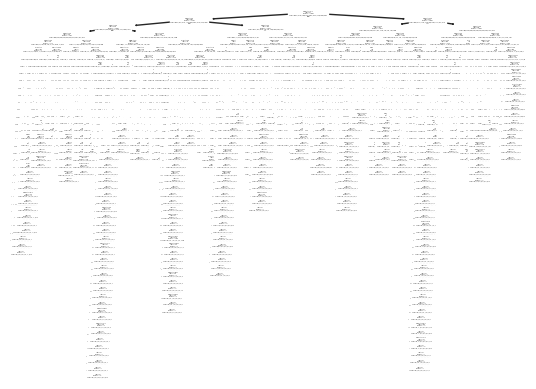

In [28]:
desicion_tree = DecisionTreeClassifier()
desicion_tree = desicion_tree.fit(x_train, y_train)
tree.plot_tree(desicion_tree)

In [29]:
dt_prediction = desicion_tree.predict(x_test)

In [30]:
confusion_matrix(y_test, dt_prediction)

array([[ 917,    1,    5,    6,    7,    9,   13,    4,   13,    5],
       [   2, 1087,   11,    2,    2,    6,    8,    5,   11,    1],
       [  10,    8,  882,   25,   10,   11,   15,   31,   29,   11],
       [   8,    5,   28,  860,    8,   42,    3,   10,   25,   21],
       [   3,    2,   10,    7,  864,    8,   15,    8,   27,   38],
       [  14,   13,    4,   49,    6,  741,   19,    6,   21,   19],
       [  19,    4,   10,   12,   16,   22,  845,    4,   22,    4],
       [   2,    9,   26,   18,    9,    5,    3,  926,   10,   20],
       [  10,    6,   27,   41,   22,   26,   18,   11,  781,   32],
       [  15,    2,    9,   19,   43,   10,    8,   18,   23,  862]],
      dtype=int64)

In [31]:
print(classification_report(y_test,dt_prediction))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.96      0.96      0.96      1135
           2       0.87      0.85      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.83      0.84       892
           6       0.89      0.88      0.89       958
           7       0.91      0.90      0.90      1028
           8       0.81      0.80      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=200)

In [34]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
rfc_prediction = rfc.predict(x_test)

In [36]:
confusion_matrix(y_test, rfc_prediction)

array([[ 972,    0,    0,    0,    0,    2,    1,    1,    3,    1],
       [   0, 1122,    1,    5,    0,    2,    2,    1,    2,    0],
       [   6,    0, 1000,    6,    3,    0,    3,    8,    6,    0],
       [   0,    0,   10,  974,    0,    7,    0,    9,    8,    2],
       [   1,    0,    2,    0,  959,    0,    4,    1,    2,   13],
       [   2,    0,    1,   10,    2,  865,    4,    1,    5,    2],
       [   5,    3,    0,    0,    2,    4,  940,    0,    4,    0],
       [   1,    4,   18,    2,    1,    0,    0,  994,    2,    6],
       [   3,    0,    6,   11,    2,    4,    5,    3,  930,   10],
       [   5,    5,    3,   10,   14,    3,    1,    4,    4,  960]],
      dtype=int64)

In [37]:
print(classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

